In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'../data/dataProcessing_files/df_modified_ver5.csv')
df

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,Day Category,Latitude,Longitude,Date,Day
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,night,34.0395,-118.2656,2010-11-8,Monday
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,early_morning,34.0695,-118.2324,2010-3-31,Wednesday
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,early_morning,34.0424,-118.2718,2010-4-18,Sunday
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,night,34.0344,-118.2714,2010-6-5,Saturday
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,evening,34.0637,-118.2361,2010-8-7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570367,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,night,34.1857,-118.5710,2022-1-26,Wednesday
570368,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,afternoon,34.1938,-118.6059,2022-1-24,Monday
570369,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,evening,34.1740,-118.5888,2022-1-24,Monday
570370,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,night,34.1624,-118.6285,2022-1-28,Friday


In [4]:
crash_rate = pd.read_csv(r'../data/final_files/crash_rate_final.csv')
crash_rate.drop(columns='Unnamed: 0', inplace=True)

In [47]:
crash_rate

,street,traffic volume,accident count,crash_rate,latitude,longitude,risk level,Frequent_Day,Frequent_Hour
0,"102ND ST, Los Angeles",2238,184,8.22,33.944103,-118.254688,low,Friday,14
1,"103RD ST, Los Angeles",138801,531,0.38,33.942642,-118.243168,low,Tuesday,14
2,"104TH ST, Los Angeles",17741,239,1.35,33.941790,-118.369982,low,Saturday,17
3,"105TH ST, Los Angeles",14131,178,1.26,34.750118,-118.316244,low,Tuesday,1
4,"10TH AV, Los Angeles",3642,145,3.98,34.037828,-118.327656,low,Saturday,15
...,...,...,...,...,...,...,...,...,...
1028,"YOLANDA AV, Los Angeles",24334,76,0.31,34.195669,-118.540414,low,Monday,7
1029,"YORK BL, Los Angeles",271200,158,0.06,33.957271,-118.050991,low,Monday,18
1030,"YUCCA ST, Los Angeles",22468,204,0.91,34.103720,-118.324950,low,Monday,6
1031,"ZELZAH AV, Los Angeles",96051,110,0.11,34.243016,-118.523271,low,Monday,8


- Going to make another dataset with crash-rates under 40%
- Use this to map it onto the larger dataset using the coordinate distancing.

In [5]:
cf_under40 = crash_rate[crash_rate['crash_rate'] <= 40].reset_index()
cf_under40.drop(columns={'index', 'risk level'}, inplace=True)
cf_under40

,street,traffic volume,accident count,crash_rate,latitude,longitude,Frequent_Day,Frequent_Hour
0,"102ND ST, Los Angeles",2238,184,8.22,33.944103,-118.254688,Friday,14
1,"103RD ST, Los Angeles",138801,531,0.38,33.942642,-118.243168,Tuesday,14
2,"104TH ST, Los Angeles",17741,239,1.35,33.941790,-118.369982,Saturday,17
3,"105TH ST, Los Angeles",14131,178,1.26,34.750118,-118.316244,Tuesday,1
4,"10TH AV, Los Angeles",3642,145,3.98,34.037828,-118.327656,Saturday,15
...,...,...,...,...,...,...,...,...
971,"YOLANDA AV, Los Angeles",24334,76,0.31,34.195669,-118.540414,Monday,7
972,"YORK BL, Los Angeles",271200,158,0.06,33.957271,-118.050991,Monday,18
973,"YUCCA ST, Los Angeles",22468,204,0.91,34.103720,-118.324950,Monday,6
974,"ZELZAH AV, Los Angeles",96051,110,0.11,34.243016,-118.523271,Monday,8


In [63]:
# print(f'Crash rates below 5% (low): {len(cf_under40[cf_under40["crash_rate"] <= 1])}')
# print(f'Crash rates between 5%-20% (medium): {len(cf_under40[(cf_under40["crash_rate"] > 1)&(cf_under40["crash_rate"] <= 10)])}')
# print(f'Crash rates above 20% (high): {len(cf_under40[cf_under40["crash_rate"] > 10])}')

In [ ]:
# For each coordinate in big dataset, compute all pairwise distances to the unique street coordinates.
# Out of those pairwise distances, choose the smallest distance and pair it with the obervation. 
# Now store the coordinate pair that resulted in the smallest distance between two observtions.

In [6]:
coords_bigData = df[['Latitude', 'Longitude']].values.tolist()
data_cr = cf_under40[['street', 'traffic volume', 'accident count', 'crash_rate', 'Frequent_Day', 'Frequent_Hour']].values.tolist()
coords_cr = cf_under40[['latitude', 'longitude']].values.tolist()

zip_ = zip(coords_cr, data_cr)
zipped_list = list(zip_)

# Storing the entire data from data_cr
# zipped_list[0][1]

# Obtaining the latitude and longitude
# zipped_list[0][0][0]
# zipped_list[0][0][1]

smallest_dist = []
smallest_data_record = []

# Each observation in big data scans with all coordinates of the crash rate data
for idx, coord_ in enumerate(coords_bigData):
    # will store 1033 distances for each coordinate
    distances = []
    # convert coordinate to radians
    bigData_coord = [radians(_) for _ in coord_]

    # loop through every coordinate in crash_rate data
    for coord in coords_cr:
        crData_coord = [radians(_) for _ in coord]
        # store the result as kilometers
        result = haversine_distances([bigData_coord, crData_coord]) * 6371000/1000
        # add the distances
        distances.append(result[1][0])
    
    # Add the smallest distance
    smallest_dist.append(min(distances))
    # Add the data corresponding to the smallest distance
    smallest_data_record.append(zipped_list[distances.index(min(distances))][1])

    # logging...
    if idx % 10000 == 0:
        print(f'Finished observation {idx}')

Finished observation 0
Finished observation 10000
Finished observation 20000
Finished observation 30000
Finished observation 40000
Finished observation 50000
Finished observation 60000
Finished observation 70000
Finished observation 80000
Finished observation 90000
Finished observation 100000
Finished observation 110000
Finished observation 120000
Finished observation 130000
Finished observation 140000
Finished observation 150000
Finished observation 160000
Finished observation 170000
Finished observation 180000
Finished observation 190000
Finished observation 200000
Finished observation 210000
Finished observation 220000
Finished observation 230000
Finished observation 240000
Finished observation 250000
Finished observation 260000
Finished observation 270000
Finished observation 280000
Finished observation 290000
Finished observation 300000
Finished observation 310000
Finished observation 320000
Finished observation 330000
Finished observation 340000
Finished observation 350000
Finish

In [21]:
df_2 = pd.DataFrame(smallest_data_record)
df['haversine_distance'] = smallest_dist
df_3 = pd.concat([df, df_2], axis=1)
df_3.rename(columns={
    0: "closest street",
    1: "traffic volume",
    2: "accident count",
    3: "crash rate",
    4: "frequent day",
    5: "frequent hour"
}, inplace=True)
df_3
#df_3.to_csv(r'../data/final_files/data_for_dbscan.csv', index=False)

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Longitude,Date,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,frequent day,frequent hour
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,-118.2656,2010-11-8,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,Wednesday,2
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,-118.2324,2010-3-31,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,Friday,13
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,-118.2718,2010-4-18,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,Sunday,8
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,-118.2714,2010-6-5,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,Tuesday,1
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,-118.2361,2010-8-7,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,Friday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570367,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,-118.5710,2022-1-26,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,Friday,17
570368,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,-118.6059,2022-1-24,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,Thursday,11
570369,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,-118.5888,2022-1-24,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,Thursday,12
570370,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,-118.6285,2022-1-28,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,Friday,15


In [24]:
df_3 = df_3[(df_3['DR Number'] != 211308053)&(df_3['DR Number'] != 211319625)].reset_index()
df_3.drop(columns={'index'}, inplace=True)
df_3

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Longitude,Date,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,frequent day,frequent hour
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,-118.2656,2010-11-8,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,Wednesday,2
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,-118.2324,2010-3-31,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,Friday,13
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,-118.2718,2010-4-18,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,Sunday,8
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,-118.2714,2010-6-5,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,Tuesday,1
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,-118.2361,2010-8-7,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,Friday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570365,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,-118.5710,2022-1-26,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,Friday,17
570366,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,-118.6059,2022-1-24,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,Thursday,11
570367,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,-118.5888,2022-1-24,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,Thursday,12
570368,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,-118.6285,2022-1-28,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,Friday,15


In [25]:
df_4 = pd.read_csv(r'../data/final_files/dbscan_apr17th.csv')
df_4.drop(columns={'Unnamed: 0'}, inplace=True)
df_3['label'] = df_4['label']
df_3

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Date,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,frequent day,frequent hour,label
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,2010-11-8,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,Wednesday,2,0
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,2010-3-31,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,Friday,13,1
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,2010-4-18,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,Sunday,8,2
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,2010-6-5,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,Tuesday,1,2
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,2010-8-7,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,Friday,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570365,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,2022-1-26,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,Friday,17,3047
570366,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,2022-1-24,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,Thursday,11,3044
570367,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,2022-1-24,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,Thursday,12,3020
570368,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,2022-1-28,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,Friday,15,3089


In [27]:
df_3.to_csv(r'../data/final_files/data_dbscan.csv', index=False)

In [ ]:
# Try to find the risk level distribution for the large dataset using the crash rates. Alter and tweak as necessary.
# Find risk level distribution for the large dataset wrt to the labels.
# Send to Abhinav.

In [3]:
df = pd.read_csv(r'../data/final_files/data_dbscan.csv')
df

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Date,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,frequent day,frequent hour,label
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,2010-11-8,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,Wednesday,2,0
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,2010-3-31,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,Friday,13,1
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,2010-4-18,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,Sunday,8,2
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,2010-6-5,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,Tuesday,1,2
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,2010-8-7,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,Friday,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570365,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,2022-1-26,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,Friday,17,3047
570366,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,2022-1-24,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,Thursday,11,3044
570367,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,2022-1-24,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,Thursday,12,3020
570368,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,2022-1-28,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,Friday,15,3089


In [19]:
print(f'Crash rates below 1% (low): {len(df[df["crash rate"] <= 1])}')
print(f'Crash rates between 1%-20% (medium): {len(df[(df["crash rate"] > 1)&(df["crash rate"] <= 20)])}')
print(f'Crash rates above 20% (high): {len(df[df["crash rate"] > 20])}')

Crash rates below 5% (low): 351381
Crash rates between 5%-20% (medium): 191011
Crash rates above 20% (high): 27978


In [20]:
def risk_level(x):
    if x <= 1:
        return 'low'
    elif x > 1 and x <= 20:
        return 'medium'
    else:
        return 'high'

df['risk level'] = df['crash rate'].apply(lambda x: risk_level(x))
df

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,frequent day,frequent hour,label,risk level
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,Wednesday,2,0,medium
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,Friday,13,1,medium
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,Sunday,8,2,medium
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,Tuesday,1,2,low
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,Friday,16,2,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570365,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,Friday,17,3047,high
570366,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,Thursday,11,3044,low
570367,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,Thursday,12,3020,low
570368,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,Friday,15,3089,medium


In [21]:
df['risk level'].value_counts()

low       351381
medium    191011
high       27978
Name: risk level, dtype: int64

In [ ]:
df.to_csv(r'../data/final_files/data_final_dbscan.csv', index=False)

In [ ]:
# Bucket Connection
import boto
import boto.s3.connection
from io import StringIO
import boto3

# Listing all buckets

conn = boto.connect_s3(
    aws_access_key_id = keys[0],
    aws_secret_access_key = keys[1]
)

for bucket in conn.get_all_buckets():
    print("{name}\t{created}".format(
        name = bucket.name,
        created = bucket.creation_date,
    ))


# Writing file into amazon S3
df = pd.read_csv(r'../data/final_files/data_final_dbscan.csv')
s3 = boto3.client('s3', aws_access_key_id=keys[0], aws_secret_access_key=keys[1])
csv_buf = StringIO()
df.to_csv(csv_buf, header=True, index=False)
csv_buf.seek(0)
s3.put_object(Bucket='sofians3', Body=csv_buf.getvalue(), Key='final_data.csv')

<hr>
<h3>Preprocessing</h3>

In [60]:
streets = crash_rate['street'].apply(lambda x: x.replace(", Los Angeles", '')).tolist()

In [61]:
streets

['2ND ST',
 'ABBOT KINNEY BL',
 'ALHAMBRA AV',
 'ALVARADO ST',
 'ANAHEIM ST',
 'AVE 26',
 'AVE 64',
 'BALBOA BL',
 'BEACHWOOD DR',
 'BERENDO ST',
 'CENTER WY',
 'COLISEUM ST',
 'DONA PEGITA DR',
 'DOVER ST',
 'FIGUEROA ST',
 'FLORENCE AV',
 'GLENDALE BL',
 'HIGHLAND AV',
 'HOLLYWOOD BL',
 'HYDE PARK BL',
 'JEFFERSON BL',
 'MAIN ST',
 'MANCHESTER AV',
 'MARENGO ST',
 'MATEO ST',
 'MEYLER ST',
 'MOTOR AV',
 'NATIONAL BL',
 'NORMANDIE AV',
 'OLYMPIC BL',
 'PARTHENIA ST',
 'PLUMMER ST',
 'RESEDA BL',
 'RIVERSIDE DR',
 'ROSCOE BL',
 'SAN FERNANDO MISSION BL',
 'SATICOY ST',
 'SHOUP AV',
 'SLAUSON AV',
 'SUNSET BL',
 'TEMPLE ST',
 'TITUS ST',
 'VAN NESS AV',
 'VAN NUYS BL',
 'VERDUGO RD',
 'VERMONT AV',
 'VINELAND AV',
 'WASHINGTON BL',
 'WENTWORTH ST',
 'WESTERN AV',
 '118 FWY',
 '161ST ST',
 '218TH ST',
 '24TH ST',
 '25TH ST',
 'ALAMEDA ST',
 'AMADOR ST',
 'ARLETA AV',
 'AVALON BL',
 'AVE 50',
 'AVE 53',
 'BEAUDRY AV',
 'BROADWAY',
 'CARSON ST',
 'CENTINELA AV',
 'CESAR CHAVEZ AV',
 'COLDW

In [62]:
len(streets)

1033

In [80]:
df['Address'] = df['Address'].apply(lambda x: " ".join(x.split()))

In [94]:
common_streets = df[['Address', 'hour', 'Day']][df['Address'].isin(streets)]
common_streets['Address'].nunique()

1033

In [104]:
common_streets['Address'] = common_streets['Address'].apply(lambda x: x+', Los Angeles')
common_streets

,Address,hour,Day
7,"OLYMPIC BL, Los Angeles",12,Friday
8,"4TH ST, Los Angeles",14,Friday
9,"OLYMPIC BL, Los Angeles",17,Friday
10,"MAPLE AV, Los Angeles",15,Friday
11,"HILL ST, Los Angeles",20,Friday
...,...,...,...
570363,"PARTHENIA ST, Los Angeles",16,Friday
570364,"TOPANGA CANYON BL, Los Angeles",1,Wednesday
570367,"WINNETKA AV, Los Angeles",19,Wednesday
570368,"TOPANGA CANYON BL, Los Angeles",15,Monday


In [118]:
majority_hours = common_streets.groupby('Address')['hour'].value_counts().unstack(level=-1).fillna(0).idxmax(axis=1).values
majority_day = common_streets.groupby('Address')['Day'].value_counts().unstack(level=-1).fillna(0).idxmax(axis=1).values

common_streets_agg = pd.DataFrame({
    'Address': common_streets['Address'].unique(),
    'Majority Hour': majority_hours,
    'Majority Day': majority_day
})

In [120]:
common_streets_agg = common_streets_agg.sort_values(by=['Address']).reset_index(drop=True)
common_streets_agg

,Address,Majority Hour,Majority Day
0,"102ND ST, Los Angeles",14,Friday
1,"103RD ST, Los Angeles",14,Tuesday
2,"104TH ST, Los Angeles",17,Saturday
3,"105TH ST, Los Angeles",1,Tuesday
4,"10TH AV, Los Angeles",15,Saturday
...,...,...,...
1028,"YOLANDA AV, Los Angeles",7,Monday
1029,"YORK BL, Los Angeles",18,Monday
1030,"YUCCA ST, Los Angeles",6,Monday
1031,"ZELZAH AV, Los Angeles",8,Monday


In [122]:
crash_rate = crash_rate.sort_values(by=['street']).reset_index(drop=True)
crash_rate

,street,traffic volume,accident count,crash_rate,latitude,longitude,risk level
0,"102ND ST, Los Angeles",2238,184,8.22,33.944103,-118.254688,low
1,"103RD ST, Los Angeles",138801,531,0.38,33.942642,-118.243168,low
2,"104TH ST, Los Angeles",17741,239,1.35,33.941790,-118.369982,low
3,"105TH ST, Los Angeles",14131,178,1.26,34.750118,-118.316244,low
4,"10TH AV, Los Angeles",3642,145,3.98,34.037828,-118.327656,low
...,...,...,...,...,...,...,...
1028,"YOLANDA AV, Los Angeles",24334,76,0.31,34.195669,-118.540414,low
1029,"YORK BL, Los Angeles",271200,158,0.06,33.957271,-118.050991,low
1030,"YUCCA ST, Los Angeles",22468,204,0.91,34.103720,-118.324950,low
1031,"ZELZAH AV, Los Angeles",96051,110,0.11,34.243016,-118.523271,low


In [127]:
crash_rate['Frequent_Day'] = common_streets_agg['Majority Day']
crash_rate['Frequent_Hour'] = common_streets_agg['Majority Hour']
crash_rate

,street,traffic volume,accident count,crash_rate,latitude,longitude,risk level,Frequent_Day,Frequent_Hour
0,"102ND ST, Los Angeles",2238,184,8.22,33.944103,-118.254688,low,Friday,14
1,"103RD ST, Los Angeles",138801,531,0.38,33.942642,-118.243168,low,Tuesday,14
2,"104TH ST, Los Angeles",17741,239,1.35,33.941790,-118.369982,low,Saturday,17
3,"105TH ST, Los Angeles",14131,178,1.26,34.750118,-118.316244,low,Tuesday,1
4,"10TH AV, Los Angeles",3642,145,3.98,34.037828,-118.327656,low,Saturday,15
...,...,...,...,...,...,...,...,...,...
1028,"YOLANDA AV, Los Angeles",24334,76,0.31,34.195669,-118.540414,low,Monday,7
1029,"YORK BL, Los Angeles",271200,158,0.06,33.957271,-118.050991,low,Monday,18
1030,"YUCCA ST, Los Angeles",22468,204,0.91,34.103720,-118.324950,low,Monday,6
1031,"ZELZAH AV, Los Angeles",96051,110,0.11,34.243016,-118.523271,low,Monday,8


In [128]:
crash_rate.to_csv('../data/final_files/crash_rate_final.csv')

<hr>


Text(0.5, 1.0, 'Frequency of crashes by Hour')

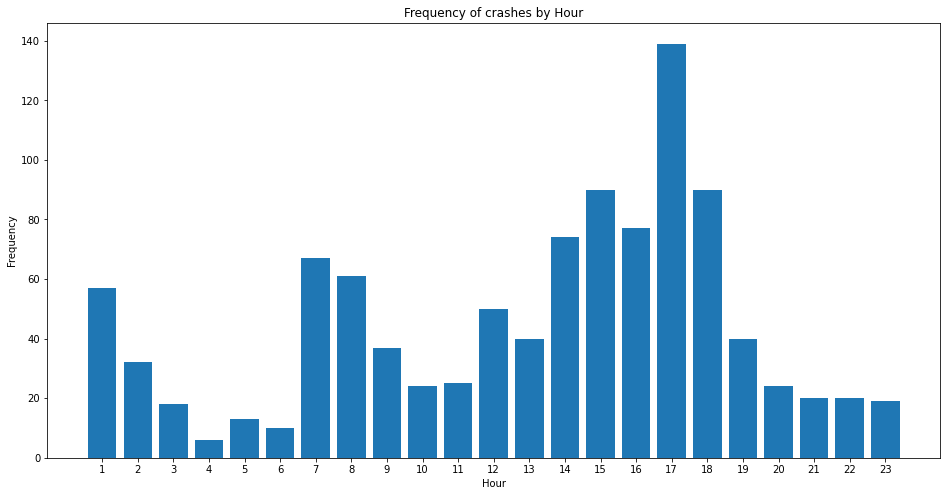

In [137]:
plt.figure(figsize=(16,8))
plt.bar(crash_rate['Frequent_Hour'].value_counts().index, crash_rate['Frequent_Hour'].value_counts().values.tolist())
plt.xlabel('Hour')
plt.xticks(crash_rate['Frequent_Hour'].value_counts().index)
plt.ylabel('Frequency')
plt.title('Frequency of crashes by Hour')

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(crash_rate['Frequent_Hour'].value_counts().index, crash_rate['Frequent_Hour'].value_counts().values.tolist())
plt.xlabel('Hour')
plt.xticks(crash_rate['Frequent_Hour'].value_counts().index)
plt.ylabel('Frequency')
plt.title('Frequency of crashes by Hour')

Text(0.5, 1.0, 'Frequency of crashes by Day')

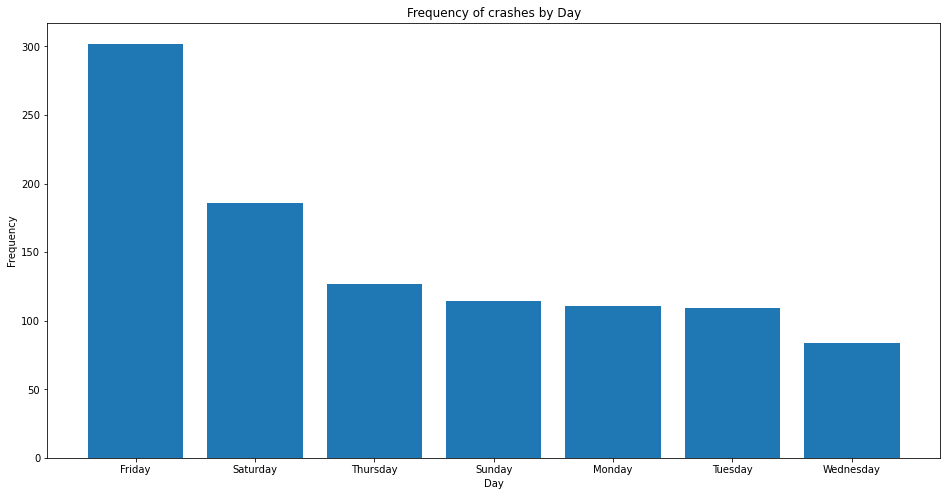

In [139]:
plt.figure(figsize=(16,8))
plt.bar(crash_rate['Frequent_Day'].value_counts().index, crash_rate['Frequent_Day'].value_counts().values.tolist())
plt.xlabel('Day')
plt.xticks(crash_rate['Frequent_Day'].value_counts().index)
plt.ylabel('Frequency')
plt.title('Frequency of crashes by Day')

In [4]:
df_cr = pd.read_csv(r'../data/dataProcessing_files/dbscan-red-data.csv')
df_cr.drop(columns={'Unnamed: 0.1', 'Unnamed: 0'}, inplace=True)

,street,traffic volume,accident count,crash_rate,latitude,longitude,risk level,label
0,"2ND ST, Los Angeles",58374,2,0.00,33.757657,-118.112587,low,4
1,"ABBOT KINNEY BL, Los Angeles",82269,3,0.00,33.991477,-118.469278,low,0
2,"ALHAMBRA AV, Los Angeles",339801,6,0.00,34.078570,-118.161112,low,0
3,"ALVARADO ST, Los Angeles",413878,11,0.00,34.067116,-118.270048,low,0
4,"ANAHEIM ST, Los Angeles",701763,10,0.00,33.781967,-118.189385,low,1
...,...,...,...,...,...,...,...,...
1019,"FILMORE ST, Los Angeles",832,7558,908.41,34.257850,-118.440679,high,0
1020,"SHOREDALE AV, Los Angeles",679,6785,999.26,34.090531,-118.232576,high,0
1021,"DEANE ST, Los Angeles",181,2107,1164.09,34.098275,-118.259244,high,0
1022,"MARTINEZ ST, Los Angeles",68,1950,2867.65,34.162968,-118.588493,high,0


In [9]:
df_cr = df_cr.sort_values(by=['street']).reset_index()
df_cr.drop(columns={'index'}, inplace=True)

In [10]:
df_cr

,street,traffic volume,accident count,crash_rate,latitude,longitude,risk level,label
0,"102ND ST, Los Angeles",2238,184,8.22,33.944103,-118.254688,low,0
1,"103RD ST, Los Angeles",138801,531,0.38,33.942642,-118.243168,low,0
2,"104TH ST, Los Angeles",17741,239,1.35,33.941790,-118.369982,low,0
3,"105TH ST, Los Angeles",14131,178,1.26,34.750118,-118.316244,low,-1
4,"10TH AV, Los Angeles",3642,145,3.98,34.037828,-118.327656,low,0
...,...,...,...,...,...,...,...,...
1019,"YOLANDA AV, Los Angeles",24334,76,0.31,34.195669,-118.540414,low,0
1020,"YORK BL, Los Angeles",271200,158,0.06,33.957271,-118.050991,low,5
1021,"YUCCA ST, Los Angeles",22468,204,0.91,34.103720,-118.324950,low,0
1022,"ZELZAH AV, Los Angeles",96051,110,0.11,34.243016,-118.523271,low,0


In [11]:
df_cr['label'].value_counts()

 0    870
 2     64
-1     60
 1     10
 3      8
 6      4
 4      4
 5      4
Name: label, dtype: int64

In [21]:
df_1 = pd.read_csv(r'../data/final_files/crash_rate_final.csv')
df_1.drop(columns={'Unnamed: 0'}, inplace=True)

In [24]:
df_2 = df_1[df_1['street'].isin(df_cr['street'])].reset_index().drop(columns={'index'})
df_2['label'] = df_cr['label']
df_2

,street,traffic volume,accident count,crash_rate,latitude,longitude,risk level,Frequent_Day,Frequent_Hour,label
0,"102ND ST, Los Angeles",2238,184,8.22,33.944103,-118.254688,low,Friday,14,0
1,"103RD ST, Los Angeles",138801,531,0.38,33.942642,-118.243168,low,Tuesday,14,0
2,"104TH ST, Los Angeles",17741,239,1.35,33.941790,-118.369982,low,Saturday,17,0
3,"105TH ST, Los Angeles",14131,178,1.26,34.750118,-118.316244,low,Tuesday,1,-1
4,"10TH AV, Los Angeles",3642,145,3.98,34.037828,-118.327656,low,Saturday,15,0
...,...,...,...,...,...,...,...,...,...,...
1019,"YOLANDA AV, Los Angeles",24334,76,0.31,34.195669,-118.540414,low,Monday,7,0
1020,"YORK BL, Los Angeles",271200,158,0.06,33.957271,-118.050991,low,Monday,18,5
1021,"YUCCA ST, Los Angeles",22468,204,0.91,34.103720,-118.324950,low,Monday,6,0
1022,"ZELZAH AV, Los Angeles",96051,110,0.11,34.243016,-118.523271,low,Monday,8,0


In [28]:
# Combine the majority label of each cluster and form label triplets for each cluster
# Dictionary which stores the cluster_number (key) and the array of majority label triplet (value)
dict_cluster = {}
# Loop through every cluster number
for i in range(df_2['label'].nunique()):
    lst = []
    # I create a dataframe that aggregates the frequency of category occurence for each cluster.
    # Unstack() is used to pivot the index labels so that rows represent the cluster number and columns represent the categories of the label
    # Fillna() is used to fill null values to 0
    # Idxmax() will return the index (category) of the first occurence of the maximum value in each cluster.
    # The majority label is appended to the list at each iteration of the label column.
    lst.append(pd.DataFrame({'Frequency': df_2.groupby('label')['risk level'].value_counts()}).unstack(level=-1).fillna(0).idxmax(axis=1)[i][1])
    # Store the majority label array in the dictionary
    dict_cluster[i] = lst

dict_cluster
# # 4. Map the label triplets to the dataframe
# df['cluster_labels'] = df['label'].apply(lambda x: dict_cluster[x])

KeyError: 7

In [32]:
pd.DataFrame({'Frequency': df_2.groupby('label')['risk level'].value_counts()}).unstack(level=-1).fillna(0)

Frequency              
risk level      high    low medium
label                             
-1               1.0   59.0    0.0
 0              39.0  810.0   21.0
 1               0.0   10.0    0.0
 2               3.0   59.0    2.0
 3               0.0    8.0    0.0
 4               0.0    4.0    0.0
 5               0.0    4.0    0.0
 6               0.0    4.0    0.0

In [33]:
df_2['risk level'].value_counts()

low       958
high       43
medium     23
Name: risk level, dtype: int64

<hr>
<h3>Evaluation</h3>

In [5]:
df = pd.read_csv(r'../data/final_files/dbscan_apr17th.csv')
df.drop(columns={'Unnamed: 0'}, inplace=True)
df

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Longitude,Date,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,risk level,label
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,-118.2656,2010-11-8,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,low,0
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,-118.2324,2010-3-31,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,low,1
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,-118.2718,2010-4-18,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,low,2
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,-118.2714,2010-6-5,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,low,2
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,-118.2361,2010-8-7,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570365,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,-118.5710,2022-1-26,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,low,3047
570366,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,-118.6059,2022-1-24,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,low,3044
570367,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,-118.5888,2022-1-24,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,low,3020
570368,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,-118.6285,2022-1-28,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,low,3089


In [16]:
df['risk level'].value_counts()

low       536178
high       23843
medium     10349
Name: risk level, dtype: int64

In [12]:
pd.DataFrame({'Frequency': df.groupby('label')['risk level'].value_counts()}).unstack(level=-1).fillna(0)


Frequency                  
risk level      high       low  medium
label                                 
-1             232.0    5376.0    57.0
 0               0.0     320.0     0.0
 1               0.0      63.0     0.0
 2            6965.0  139408.0  2071.0
 3               0.0      77.0     0.0
...              ...       ...     ...
 4727            0.0       5.0     0.0
 4728            0.0       2.0     0.0
 4729            0.0       5.0     0.0
 4730            0.0       7.0     0.0
 4731            0.0       4.0     0.0

[4733 rows x 3 columns]

- Almost all of the clusters represent low risk regions. May need to change the threshold.

In [13]:
df['crash rate'].describe()

count    570370.000000
mean         15.430066
std          97.868401
min           0.000000
25%           0.050000
50%           0.480000
75%           4.950000
max        3073.810000
Name: crash rate, dtype: float64

In [23]:
df['crash rate'][df['crash rate'] < 0.01]

5         0.0
12        0.0
20        0.0
24        0.0
34        0.0
         ... 
570325    0.0
570334    0.0
570338    0.0
570348    0.0
570350    0.0
Name: crash rate, Length: 42427, dtype: float64

- less than 0.01: 42k
- less than 0.02 and greater than 0.01: 

In [14]:
df['crash rate'][df['crash rate'] > 100]

1262      218.80
1484      218.80
1700      218.80
1783      218.80
1978      218.80
           ...  
570075    908.41
570105    908.41
570122    908.41
570125    113.62
570271    908.41
Name: crash rate, Length: 16311, dtype: float64

<hr>
<h3>Pre-processing for backend</h3>

In [5]:
import pandas as pd
import numpy as np
from math import radians
df = pd.read_csv(r'../data/final_files/data_final.csv')
df_clusters = pd.read_csv(r'../data/final_files/cluster_centers_cartesian.csv')

In [4]:
df = df[df['label'] != -1]
df

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,...,Day,haversine_distance,closest street,traffic volume,accident count,crash rate,frequent day,frequent hour,label,risk level
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,...,Monday,0.592942,"10TH ST, Los Angeles",2750,127,4.62,Wednesday,2,0,medium
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,...,Wednesday,0.383161,"SOLANO AV, Los Angeles",21620,2404,11.12,Friday,13,1,medium
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,...,Sunday,0.442127,"ALBANY ST, Los Angeles",8232,1369,16.63,Sunday,8,2,medium
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,...,Saturday,0.580183,"PARK GROVE AV, Los Angeles",39584,11,0.03,Tuesday,1,2,low
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,...,Saturday,0.007885,"COLLEGE ST, Los Angeles",18790,230,1.22,Friday,16,2,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570365,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,...,Wednesday,0.712744,"PENFIELD AV, Los Angeles",2566,572,22.29,Friday,17,3047,high
570366,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,...,Monday,0.421375,"TOPANGA CANYON BL, Los Angeles",396045,29,0.01,Thursday,11,3044,low
570367,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,...,Monday,0.777722,"DE SOTO AV, Los Angeles",744448,139,0.02,Thursday,12,3020,low
570368,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,...,Friday,0.506140,"CANZONET ST, Los Angeles",1135,13,1.15,Friday,15,3089,medium


In [5]:
df['label'].nunique()

4732

In [9]:
df['label'].info()

<class 'pandas.core.series.Series'>
Int64Index: 564705 entries, 0 to 570369
Series name: label
Non-Null Count   Dtype
--------------   -----
564705 non-null  int64
dtypes: int64(1)
memory usage: 8.6 MB


In [9]:
df_clusters.drop(columns={'Unnamed: 0'}, inplace=True)
df_clusters

,label,Latitude,Longitude
0,0.0,34.040109,-118.267155
1,1.0,34.069810,-118.233746
2,2.0,34.033337,-118.279672
3,3.0,34.067035,-118.235877
4,4.0,34.049178,-118.241661
...,...,...,...
4727,4728.0,34.298600,-118.512800
4728,4719.0,34.097800,-118.392300
4729,4720.0,34.074700,-118.356300
4730,4723.0,34.131800,-118.430800


In [10]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   label      4732 non-null   float64
 1   Latitude   4732 non-null   float64
 2   Longitude  4732 non-null   float64
dtypes: float64(3)
memory usage: 111.0 KB


In [12]:
df_clusters['label'] = df_clusters['label'].astype(int)
df_clusters['label'].nunique()

4732

In [11]:
zip_ = zip(df_clusters['label'], df_clusters[['Latitude', 'Longitude']].values.tolist())
zipped_list = list(zip_)

In [18]:
zipped_list

[(0, [34.040108747832136, -118.2671546814175]),
 (1, [34.06980951951211, -118.23374602426068]),
 (2, [34.03333699358641, -118.27967230102328]),
 (3, [34.06703506308998, -118.2358766233516]),
 (4, [34.04917816065187, -118.24166091929008]),
 (5, [34.03410280689354, -118.2369652396607]),
 (6, [34.06544528637101, -118.23100176395998]),
 (7, [34.016028567462, -118.49246429553818]),
 (8, [34.0566805134816, -118.23189061588556]),
 (9, [34.056070212050784, -118.24933758659364]),
 (10, [34.04440344824135, -118.25929655179316]),
 (11, [34.003949999632056, -118.4780999994113]),
 (12, [34.03636666629989, -118.27326000044012]),
 (13, [34.069248617640135, -118.24611467420787]),
 (14, [34.04225749991482, -118.26672000008136]),
 (15, [34.06018064509498, -118.22942903245696]),
 (16, [34.06935237253827, -118.22720761840944]),
 (17, [34.03179999999998, -118.2388]),
 (18, [34.062574999988946, -118.24880000000002]),
 (19, [34.04565161238634, -118.23300645281888]),
 (20, [34.07120322491929, -118.22991129159

In [19]:
def get_coordinate(x):
    for cluster, coordinate in zipped_list:
        if cluster == x:
            return coordinate

df['Coordinates'] = df['label'].apply(lambda x: get_coordinate(x))

In [22]:
df.columns

Index(['DR Number', 'Area ID', 'Area Name', 'Premise Description', 'Address',
       'Cross Street', 'month', 'day', 'year', 'hour', 'Day Category',
       'Latitude', 'Longitude', 'Date', 'Day', 'haversine_distance',
       'closest street', 'traffic volume', 'accident count', 'crash rate',
       'frequent day', 'frequent hour', 'label', 'risk level', 'Coordinates'],
      dtype='object')

In [24]:
df = df[['label', 'Day', 'hour', 'traffic volume', 'accident count', 'risk level', 'Coordinates', 'crash rate', 'Address']]
df.columns = ['label', 'day_week', 'hour', 'traffic_volume', 'accident_count', 'risk_level', 'coordinates', 'crash_rate', 'address']
df

,label,day_week,hour,traffic_volume,accident_count,risk_level,coordinates,crash_rate,address
0,0,Monday,22,2750,127,medium,"[34.040108747832136, -118.2671546814175]",4.62,PICO
1,1,Wednesday,4,21620,2404,medium,"[34.06980951951211, -118.23374602426068]",11.12,1300 N BROADWAY
2,2,Sunday,1,8232,1369,medium,"[34.03333699358641, -118.27967230102328]",16.63,PICO
3,2,Saturday,20,39584,11,low,"[34.03333699358641, -118.27967230102328]",0.03,FIGUEROA
4,2,Saturday,16,18790,230,medium,"[34.03333699358641, -118.27967230102328]",1.22,COLLEGE
...,...,...,...,...,...,...,...,...,...
570365,3047,Wednesday,19,2566,572,high,"[34.18571038959552, -118.5709077921964]",22.29,WINNETKA AV
570366,3044,Monday,15,396045,29,low,"[34.1938000000002, -118.6059000000001]",0.01,TOPANGA CANYON BL
570367,3020,Monday,17,744448,139,low,"[34.1729735150491, -118.58829755919392]",0.02,DE SOTO AV
570368,3089,Friday,19,1135,13,medium,"[34.16248181812455, -118.62795000053302]",1.15,AVENUE SAN LUIS


In [25]:
df.to_csv(r'../data/final_files/data_final.csv')

In [47]:
label = df['label']
coordinates = df['coordinates']
zip_ = zip(label, coordinates)
zipped_list = list(zip_)

In [8]:
for i in df['coordinates']:
    

0         [34.040108747832136, -118.2671546814175]
1         [34.06980951951211, -118.23374602426068]
2         [34.03333699358641, -118.27967230102328]
3         [34.03333699358641, -118.27967230102328]
4         [34.03333699358641, -118.27967230102328]
                            ...                   
564700     [34.18571038959552, -118.5709077921964]
564701      [34.1938000000002, -118.6059000000001]
564702     [34.1729735150491, -118.58829755919392]
564703    [34.16248181812455, -118.62795000053302]
564704                         [34.1658, -118.601]
Name: coordinates, Length: 564705, dtype: object

In [15]:
df = pd.read_csv(r'../data/final_files/data_final.csv')
df


,Unnamed: 0,label,day_week,hour,traffic_volume,accident_count,risk_level,coordinates,crash_rate,address
0,0,0,Monday,22,2750,127,medium,"[34.040108747832136, -118.2671546814175]",4.62,PICO
1,1,1,Wednesday,4,21620,2404,medium,"[34.06980951951211, -118.23374602426068]",11.12,1300 N BROADWAY
2,2,2,Sunday,1,8232,1369,medium,"[34.03333699358641, -118.27967230102328]",16.63,PICO
3,3,2,Saturday,20,39584,11,low,"[34.03333699358641, -118.27967230102328]",0.03,FIGUEROA
4,4,2,Saturday,16,18790,230,medium,"[34.03333699358641, -118.27967230102328]",1.22,COLLEGE
...,...,...,...,...,...,...,...,...,...,...
564700,570365,3047,Wednesday,19,2566,572,high,"[34.18571038959552, -118.5709077921964]",22.29,WINNETKA AV
564701,570366,3044,Monday,15,396045,29,low,"[34.1938000000002, -118.6059000000001]",0.01,TOPANGA CANYON BL
564702,570367,3020,Monday,17,744448,139,low,"[34.1729735150491, -118.58829755919392]",0.02,DE SOTO AV
564703,570368,3089,Friday,19,1135,13,medium,"[34.16248181812455, -118.62795000053302]",1.15,AVENUE SAN LUIS


In [19]:
import ast
label = df['label']
coordinates = [ast.literal_eval(i) for i in df['coordinates']]
zip_ = zip(label, coordinates)
zipped_list = list(zip_)
zipped_list

[(0, [34.040108747832136, -118.2671546814175]),
 (1, [34.06980951951211, -118.23374602426068]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (0, [34.040108747832136, -118.2671546814175]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (3, [34.06703506308998, -118.2358766233516]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102328]),
 (2, [34.03333699358641, -118.27967230102

In [26]:
df['coordinates'] = [ast.literal_eval(i) for i in df['coordinates']]

ValueError: malformed node or string: [34.040108747832136, -118.2671546814175]